<a href="https://colab.research.google.com/github/kimdesok/examples/blob/master/GFPGAN_inference_PaperModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GFPGAN Inference Demo (Paper Model)


[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2101.04061)
[![GitHub Stars](https://img.shields.io/github/stars/TencentARC/GFPGAN?style=social)](https://github.com/TencentARC/GFPGAN)
[![download](https://img.shields.io/github/downloads/TencentARC/GFPGAN/total.svg)](https://github.com/TencentARC/GFPGAN/releases)

## GFPGAN - Towards Real-World Blind Face Restoration with Generative Facial Prior

GFPGAN is a blind face restoration algorithm towards real-world face images. <br>
It leverages the generative face prior in a pre-trained GAN (*e.g.*, StyleGAN2) to restore realistic faces while precerving fidelity. <br>

You may want to try an **imporoved** model without colorization. (It also does not require CUDA extensions). Please go to this [Colab Demo](https://colab.research.google.com/drive/1sVsoBd9AjckIXThgtZhGrHRfFI6UUYOo) for GFPGAN <a href="https://colab.research.google.com/drive/1sVsoBd9AjckIXThgtZhGrHRfFI6UUYOo"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="google colab logo"></a>.

**Limitations**: GFPGAN could not handle all the low-quality faces in the real world. Therefore, it may fail on your own cases.

###Enjoy! :-)

<img src="https://xinntao.github.io/projects/GFPGAN_src/gfpgan_teaser.jpg" width="800">

# Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU

in the **Runtime** menu -> **Change runtime type**

Then, we clone the repository, set up the envrironment, and download the pre-trained model.


In [1]:
# Clone GFPGAN and enter the GFPGAN folder
%cd /content
!rm -rf GFPGAN
!git clone https://github.com/TencentARC/GFPGAN.git
%cd GFPGAN

# Set up the environment
# Install basicsr - https://github.com/xinntao/BasicSR
# Set BASICSR_EXT=True to compile the cuda extensions in the BasicSR - It may take several minutes to compile, please be patient.
!BASICSR_EXT=True pip install basicsr
# Install facexlib - https://github.com/xinntao/facexlib
# We use face detection and face restoration helper in the facexlib package
!pip install facexlib
# Install other depencencies
!pip install -r requirements.txt
!python setup.py develop
!pip install realesrgan  # used for enhancing the background (non-face) regions
# Download the pre-trained model
!wget https://github.com/TencentARC/GFPGAN/releases/download/v0.1.0/GFPGANv1.pth -P experiments/pretrained_models

/content
Cloning into 'GFPGAN'...
remote: Enumerating objects: 444, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 444 (delta 4), reused 13 (delta 3), pack-reused 426
Receiving objects: 100% (444/444), 5.37 MiB | 12.02 MiB/s, done.
Resolving deltas: 100% (218/218), done.
/content/GFPGAN
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 171 kB 28.6 MB/s 
     |████████████████████████████████| 5.9 MB 56.2 MB/s 
     |████████████████████████████████| 190 kB 71.4 MB/s 
  Created wheel for basicsr: filename=basicsr-1.4.1-cp37-cp37m-linux_x86_64.whl size=4458491 sha256=71457d30621d4e71a7f6ef691a3b4342ce1cdff8f5e762c11cc2b5fd9d55e217
  Stored in directory: /root/.cache/pip/wheels/36/c5/b3/dc9fdd1dc0f95e37ef35144686bfa374cb81985a38a8539ba0
Successfully built basicsr
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/c

running develop
running egg_info
creating gfpgan.egg-info
writing gfpgan.egg-info/PKG-INFO
writing dependency_links to gfpgan.egg-info/dependency_links.txt
writing requirements to gfpgan.egg-info/requires.txt
writing top-level names to gfpgan.egg-info/top_level.txt
writing manifest file 'gfpgan.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'gfpgan.egg-info/SOURCES.txt'
running build_ext
Creating /usr/local/lib/python3.7/dist-packages/gfpgan.egg-link (link to .)
Adding gfpgan 1.3.4 to easy-install.pth file

Installed /content/GFPGAN
Processing dependencies for gfpgan==1.3.4
Searching for yapf==0.32.0
Best match: yapf 0.32.0
Adding yapf 0.32.0 to easy-install.pth file
Installing yapf script to /usr/local/bin
Installing yapf-diff script to /usr/local/bin

Using /usr/local/lib/python3.7/dist-packages
Searching for tqdm==4.64.0
Best match: tqdm 4.64.0
Adding tqdm 4.64.0 to easy-install.pth file
Installing tqdm script to /us

# Inference cropped face images

We first look at the cropped low-quality faces.<br>
Some examples are in the <inputs/cropped_faces> folder.

(-0.5, 511.5, 511.5, -0.5)

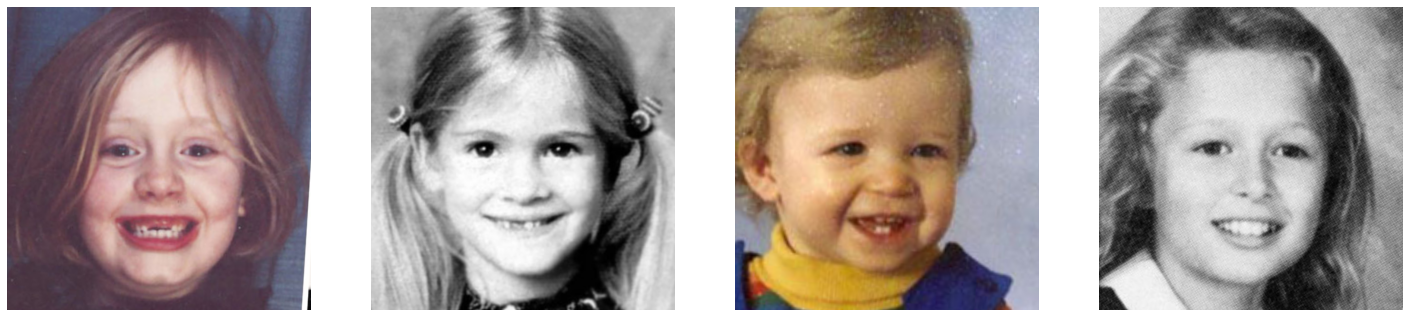

In [2]:
# visulize the cropped low-quality faces
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# read images
img1 = imread('inputs/cropped_faces/Adele_crop.png')
img2 = imread('inputs/cropped_faces/Julia_Roberts_crop.png')
img3 = imread('inputs/cropped_faces/Justin_Timberlake_crop.png')
img4 = imread('inputs/cropped_faces/Paris_Hilton_crop.png')

# show images
fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(1, 4, 1) 
ax1.imshow(img1)
ax1.axis('off')
ax2 = fig.add_subplot(1, 4, 2) 
ax2.imshow(img2)
ax2.axis('off')
ax3 = fig.add_subplot(1, 4, 3) 
ax3.imshow(img3)
ax3.axis('off')
ax4 = fig.add_subplot(1, 4, 4) 
ax4.imshow(img4)
ax4.axis('off')

In [3]:
# Now we use the GFPGAN to restore the above low-quality images
# You can find the different models in https://github.com/TencentARC/GFPGAN#european_castle-model-zoo
!rm -rf results
!python inference_gfpgan.py -i inputs/cropped_faces -o results -v 1 -s 2 --aligned

# Usage: python inference_gfpgan.py -i inputs/whole_imgs -o results -v 1.3 -s 2 [options]...
# 
#  -h                   show this help
#  -i input             Input image or folder. Default: inputs/whole_imgs
#  -o output            Output folder. Default: results
#  -v version           GFPGAN model version. Option: 1 | 1.2 | 1.3. Default: 1.3
#  -s upscale           The final upsampling scale of the image. Default: 2
#  -bg_upsampler        background upsampler. Default: realesrgan
#  -bg_tile             Tile size for background sampler, 0 for no tile during testing. Default: 400
#  -suffix              Suffix of the restored faces
#  -only_center_face    Only restore the center face
#  -aligned             Input are aligned faces
#  -ext                 Image extension. Options: auto | jpg | png, auto means using the same extension as inputs. Default: auto


Downloading: "https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.1/RealESRGAN_x2plus.pth" to /usr/local/lib/python3.7/dist-packages/realesrgan/weights/RealESRGAN_x2plus.pth

100% 64.0M/64.0M [00:00<00:00, 331MB/s]
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth" to /usr/local/lib/python3.7/dist-packages/facexlib/weights/detection_Resnet50_Final.pth

100% 1

In [4]:
# Now, let us to look at the reuslts! :-)
# The results are in the <resutls> folder
!ls results

cmp  cropped_faces  restored_faces


(-0.5, 1023.5, 511.5, -0.5)

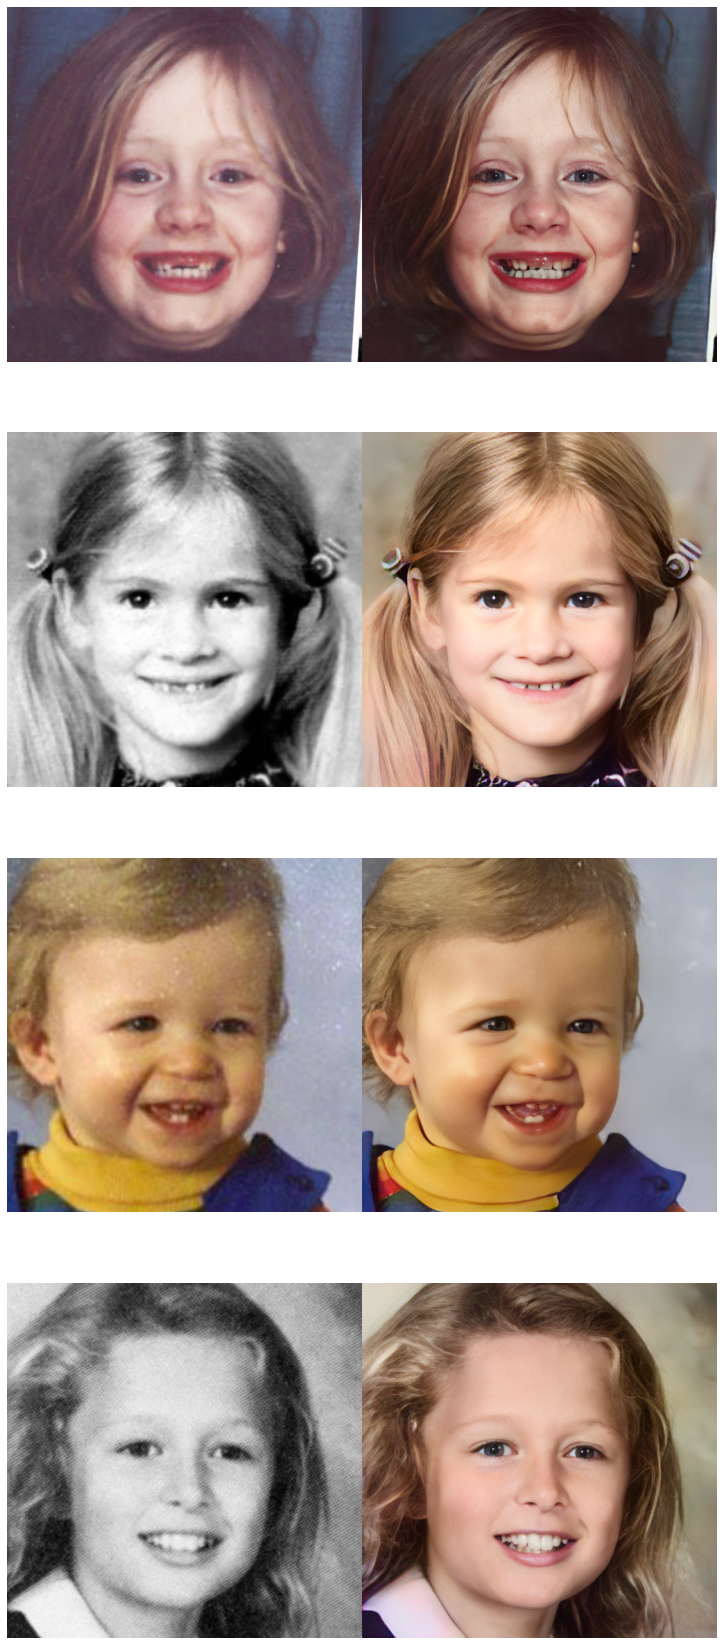

In [5]:
# Visualize the results
# The left are the inputs images; the right are the results of GFPGAN
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# read images
img1 = imread('results/cmp/Adele_crop_00.png')
img2 = imread('results/cmp/Julia_Roberts_crop_00.png')
img3 = imread('results/cmp/Justin_Timberlake_crop_00.png')
img4 = imread('results/cmp/Paris_Hilton_crop_00.png')

# show images
fig = plt.figure(figsize=(15, 30))
ax1 = fig.add_subplot(4, 1, 1) 
ax1.imshow(img1)
ax1.axis('off')
ax2 = fig.add_subplot(4, 1, 2) 
ax2.imshow(img2)
ax2.axis('off')
ax3 = fig.add_subplot(4, 1, 3) 
ax3.imshow(img3)
ax3.axis('off')
ax4 = fig.add_subplot(4, 1, 4) 
ax4.imshow(img4)
ax4.axis('off')

We can see that:
Not only the **facial details**, but also the **colors** are enhanced by the GFPGAN model.

# Inference whole images

We use `facexlib` to detect and crop face images on a whole photo, and then restore the face images by GFPGAN.

Note that currently, it does not well support to paste the faces back into the original photo, as the restored faces are incosistent with the original photos in terms of details and colors.<br>
You can find the improved version in this [Colab Demo](https://colab.research.google.com/drive/1sVsoBd9AjckIXThgtZhGrHRfFI6UUYOo).

<br>

Now, we will enhance the faces in the following two photos.



(-0.5, 782.5, 1145.5, -0.5)

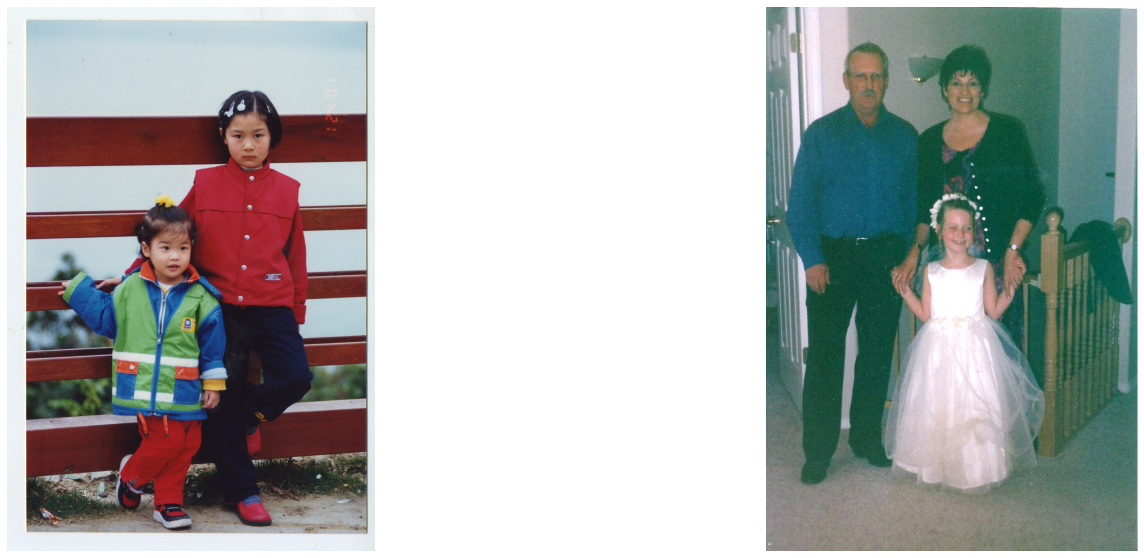

In [6]:
# Visualize input images to be resotred
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# read images
img1 = imread('inputs/whole_imgs/00.jpg')
img2 = imread('inputs/whole_imgs/10045.png')

# show images
fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(1, 2, 1) 
ax1.imshow(img1)
ax1.axis('off')
ax2 = fig.add_subplot(1, 2, 2) 
ax2.imshow(img2)
ax2.axis('off')

In [7]:
# Now we use the GFPGAN to restore the above low-quality images
# We use [Real-ESRGAN](https://github.com/xinntao/Real-ESRGAN) for enhancing the background (non-face) regions
# You can find the different models in https://github.com/TencentARC/GFPGAN#european_castle-model-zoo
!rm -rf results
!python inference_gfpgan.py -i inputs/whole_imgs -o results -v 1 -s 2 --bg_upsampler realesrgan

# Usage: python inference_gfpgan.py -i inputs/whole_imgs -o results -v 1.3 -s 2 [options]...
# 
#  -h                   show this help
#  -i input             Input image or folder. Default: inputs/whole_imgs
#  -o output            Output folder. Default: results
#  -v version           GFPGAN model version. Option: 1 | 1.2 | 1.3. Default: 1.3
#  -s upscale           The final upsampling scale of the image. Default: 2
#  -bg_upsampler        background upsampler. Default: realesrgan
#  -bg_tile             Tile size for background sampler, 0 for no tile during testing. Default: 400
#  -suffix              Suffix of the restored faces
#  -only_center_face    Only restore the center face
#  -aligned             Input are aligned faces
#  -ext                 Image extension. Options: auto | jpg | png, auto means using the same extension as inputs. Default: auto


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Processing 00.jpg ...
	Tile 1/20
	Tile 2/20
	Tile 3/20
	Tile 4/20
	Tile 5/20
	Tile 6/20
	Tile 7/20
	Tile 8/20
	Tile 9/20
	Tile 10/20
	Tile 11/20
	Tile 12/20
	Tile 13/20
	Tile 14/20
	Tile 15/20
	Tile 16/20
	Tile 17/20
	Tile 18/20
	Tile 19/20
	Tile 20/20
Processing 10045.png ...
	Tile 1/6
	Tile 2/6
	Tile 3/6
	Tile 4/6
	Tile 5/6
	Tile 6/6
Processing Blake_Lively.jpg ...
	Tile 1/4
	Tile 2/4
	Tile 3/4
	Tile 4/4
Results are in 

(-0.5, 1023.5, 511.5, -0.5)

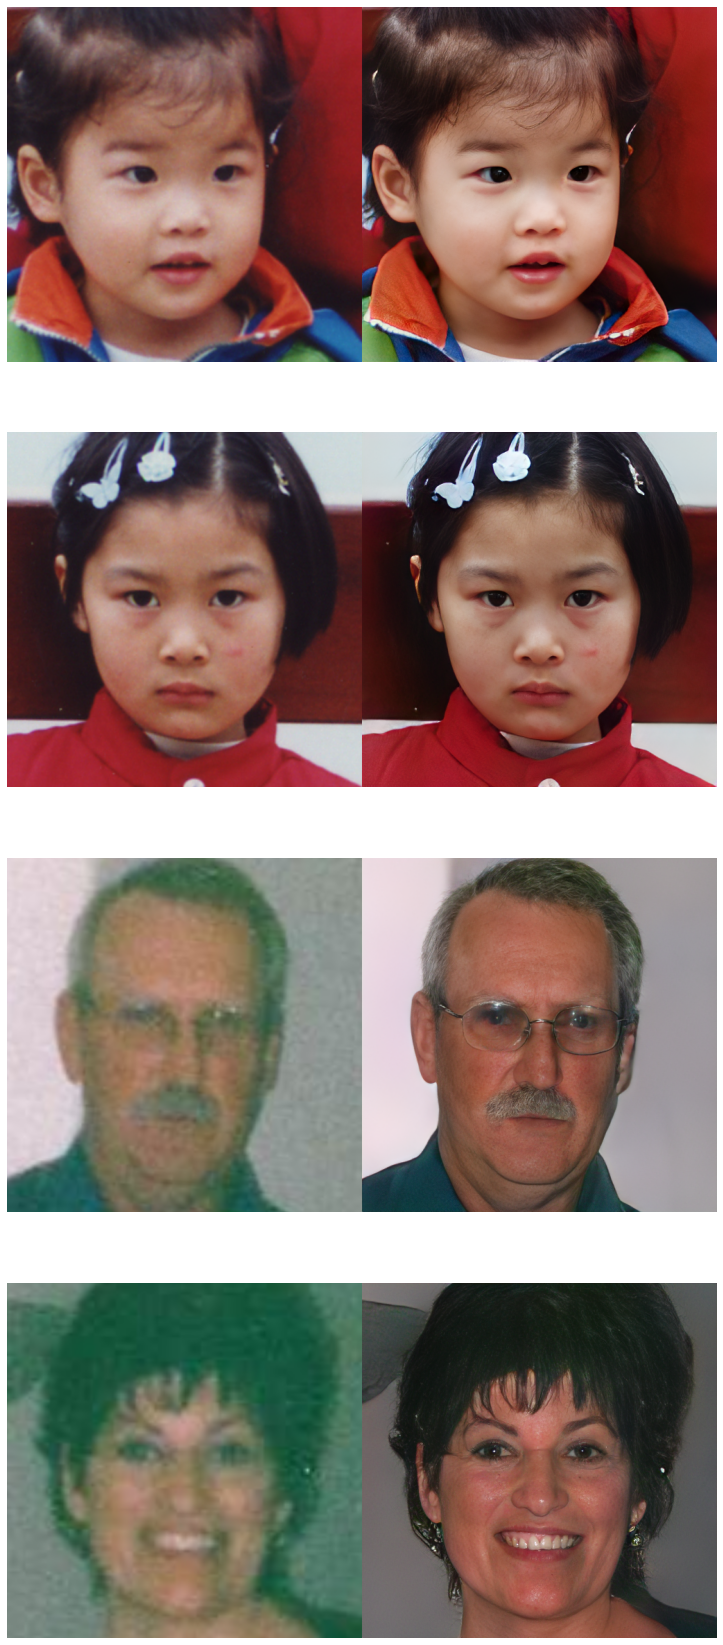

In [8]:
# Visualize the results
# The left are the inputs images; the right are the results of GFPGAN
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# read images
img1 = imread('results/cmp/00_00.png')
img2 = imread('results/cmp/00_01.png')
img3 = imread('results/cmp/10045_02.png')
img4 = imread('results/cmp/10045_01.png')

# show images
fig = plt.figure(figsize=(15, 30))
ax1 = fig.add_subplot(4, 1, 1) 
ax1.imshow(img1)
ax1.axis('off')
ax2 = fig.add_subplot(4, 1, 2) 
ax2.imshow(img2)
ax2.axis('off')
ax3 = fig.add_subplot(4, 1, 3) 
ax3.imshow(img3)
ax3.axis('off')
ax4 = fig.add_subplot(4, 1, 4) 
ax4.imshow(img4)
ax4.axis('off')

(-0.5, 1565.5, 2291.5, -0.5)

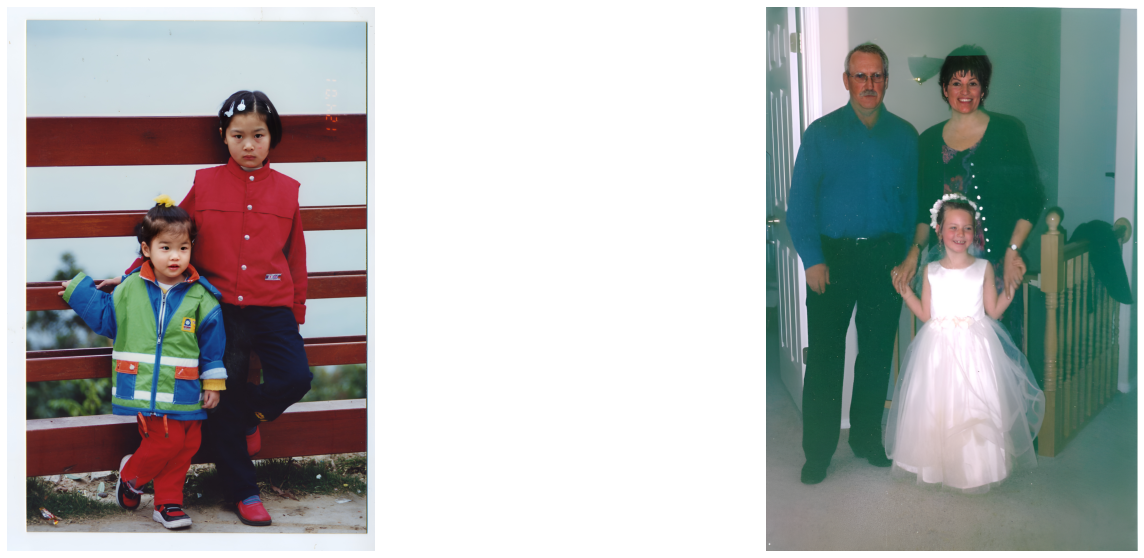

In [9]:
# Visualize the whole images 
# However, due to the color and detail inconsistency, the results may look unnatural. 

import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# read images
img1 = imread('results/restored_imgs/00.jpg')
img2 = imread('results/restored_imgs/10045.png')

# show images
fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(1, 2, 1) 
ax1.imshow(img1)
ax1.axis('off')
ax2 = fig.add_subplot(1, 2, 2) 
ax2.imshow(img2)
ax2.axis('off')

You can see that:
1. the faces in the first photo are enhanced and the whole result looks natural;
2. However, as the face colors have been largely changed in the second photo, therefore, the whole result looks inconsistent.

BTW, we use [Real-ESRGAN](https://github.com/xinntao/Real-ESRGAN) for enhancing the background (non-face) regions.

# Try it on uploaded images

## 1. Upload images

In [41]:
import os
from google.colab import files
import shutil

upload_folder = 'inputs/upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.mkdir(upload_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving Darina.png to Darina.png
move Darina.png to inputs/upload/Darina.png


## 2. Inference

In [42]:
# Now we use the GFPGAN to restore the above low-quality images
# We use [Real-ESRGAN](https://github.com/xinntao/Real-ESRGAN) for enhancing the background (non-face) regions
# You can find the different models in https://github.com/TencentARC/GFPGAN#european_castle-model-zoo
!rm -rf results
!python inference_gfpgan.py -i inputs/upload -o results -v 1 -s 3 --bg_upsampler realesrgan
!ls results/cmp
# Usage: python inference_gfpgan.py -i inputs/whole_imgs -o results -v 1.3 -s 2 [options]...
# 
#  -h                   show this help
#  -i input             Input image or folder. Default: inputs/whole_imgs
#  -o output            Output folder. Default: results
#  -v version           GFPGAN model version. Option: 1 | 1.2 | 1.3. Default: 1.3
#  -s upscale           The final upsampling scale of the image. Default: 2
#  -bg_upsampler        background upsampler. Default: realesrgan
#  -bg_tile             Tile size for background sampler, 0 for no tile during testing. Default: 400
#  -suffix              Suffix of the restored faces
#  -only_center_face    Only restore the center face
#  -aligned             Input are aligned faces
#  -ext                 Image extension. Options: auto | jpg | png, auto means using the same extension as inputs. Default: auto

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Processing Darina.png ...
	Tile 1/2
	Tile 2/2
Results are in the [results] folder.
Darina_00.png  Darina_02.png  Darina_04.png  Darina_06.png
Darina_01.png  Darina_03.png  Darina_05.png


## 3. Visualize

(-0.5, 953.5, 1100.5, -0.5)

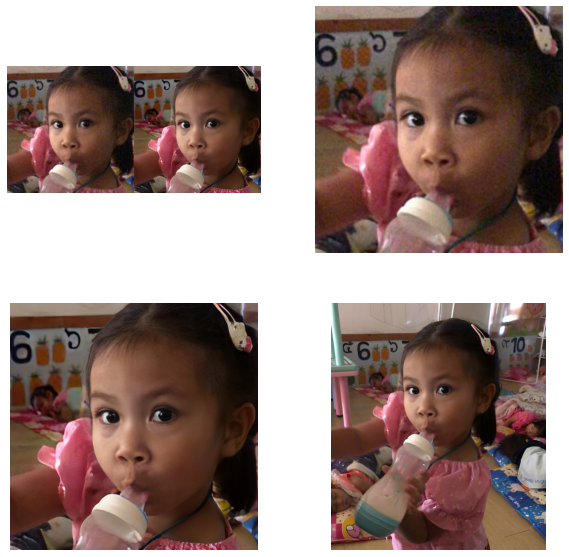

In [39]:
# Visualize the results
# The left are the inputs images; the right are the results of GFPGAN
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# read images
img1 = imread('/content/GFPGAN/results/cmp/DarinaKid_00.png')
img2 = imread('/content/GFPGAN/results/cropped_faces/DarinaKid_00.png')
img3 = imread('/content/GFPGAN/results/restored_faces/DarinaKid_00.png')
img4 = imread('/content/GFPGAN/results/restored_imgs/DarinaKid.png')


# show images
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 2, 1) 
ax1.imshow(img1)
ax1.axis('off')

ax2 = fig.add_subplot(2, 2, 2) 
ax2.imshow(img2)
ax2.axis('off')

ax3 = fig.add_subplot(2, 2, 3) 
ax3.imshow(img3)
ax3.axis('off')

ax4 = fig.add_subplot(2, 2, 4) 
ax4.imshow(img4)
ax4.axis('off')


## 4. Download results

In [ ]:
# download the result
!ls results
print('Download results')
os.system('zip -r download.zip results')
files.download("download.zip")

cmp  cropped_faces  restored_faces
Download results


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

You may want to try an **imporoved** model without colorization. (It also does not require CUDA extensions). Please go to this [Colab Demo](https://colab.research.google.com/drive/1sVsoBd9AjckIXThgtZhGrHRfFI6UUYOo) for GFPGAN <a href="https://colab.research.google.com/drive/1sVsoBd9AjckIXThgtZhGrHRfFI6UUYOo"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="google colab logo"></a>.